<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Credit-Card-Fraud-Detection/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/My Drive/CreditCardFraud/creditcard.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470400,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125894,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624502,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108301,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095922,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,-1.193650e-11,-8.321435e-11,-1.193722e-10,-5.758218e-11,-8.075736e-12,-4.880404e-11,1.685322e-11,6.249845e-11,1.551921e-10,2.598242e-11,2.247260e-11,-2.071656e-11,-3.721897e-11,-1.148146e-10,-1.278054e-10,-3.159957e-12,-4.178273e-11,3.581405e-11,-5.723168e-11,5.372069e-11,1.860924e-11,4.880475e-11,-2.071527e-11,2.703579e-11,8.286263e-11,-4.880476e-11,9.128964e-12,5.617856e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203733e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915970e-01,-7.682956e-01,-5.540759e-01,-2.086298e-01,-6.430976e-01,-5.354258e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545862e-01,-3.171450e-01,-3.269839e-01,-7.083955e-02,-5.295980e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548560e-02,1.798463e-01,-1.984650e-02,-5.433580e-02,-2.741871e-01,4.010310e-02,2.235800e-02,-5.142870e-02,-9.291740e-02,-3.275740e-02,1.400326e-01,-1.356810e-02,5.060130e-02,4.807150e-02,6.641330e-02,-6.567580e-02,-3.636300e-03,3.734800e-03,-6.248110e-02,-2.945020e-02,6.781900e-03,-1.119290e-02,4.097610e-02,1.659350e-02,-5.213910e-02,1.342100e-03,1.124380e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027195e+00,7.433412e-01,6.119265e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971391e-01,4.539235e-01,7.395934e-01,6.182380e-01,6.625049e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589493e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104515e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f825368e438>,
      dtype=object)

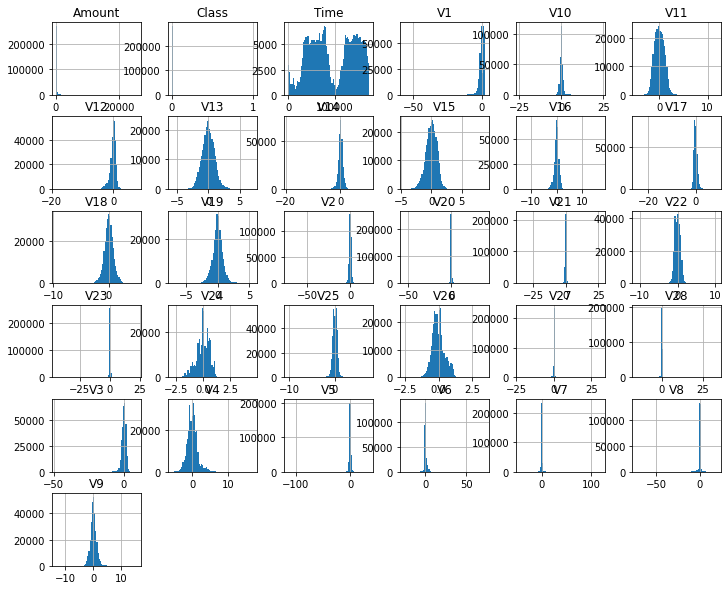

In [ ]:
data.hist(figsize=(12,10), bins=70)

In [ ]:
data['Class'].value_counts()

"""
OR  print(data.groupby('Class').size())"""

"\nOR  print(data.groupby('Class').size())"

In [ ]:
import matplotlib.pyplot as plt

"""
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1)
plt.show()
"""

"\ndata.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1)\nplt.show()\n"

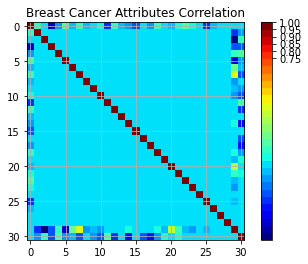

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


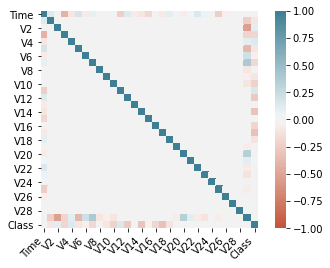

In [ ]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

In [ ]:
from sklearn.model_selection import train_test_split
Y = data['Class'].values
X = data.drop('Class', axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)
print("X_train.shape: ", X_train.shape, "X_test.shape: ", X_test.shape, "Y_train.shape: ", Y_train.shape, "Y_test.shape: ", Y_test.shape)

"""
print(Y_train.value_counts(), "\n\n", Y_test.value_counts())

0    227462
1       383
Name: Class, dtype: int64 

0    56853
1      109
Name: Class, dtype: int64
"""

X_train.shape:  (227845, 30) X_test.shape:  (56962, 30) Y_train.shape:  (227845,) Y_test.shape:  (56962,)


'\nprint(Y_train.value_counts(), "\n\n", Y_test.value_counts())\n\n0    227462\n1       383\nName: Class, dtype: int64 \n\n0    56853\n1      109\nName: Class, dtype: int64\n'

#ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
from sklearn.model_selection import KFold
from time import time
from sklearn.model_selection import cross_val_score

num_folds = 10
names = []
results = []

for name, model in models_list:
  kfold = KFold(n_splits = num_folds)
  start = time()
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
  end  = time()
  results.append(cv_results)
  names.append(name)
  print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.999179 (0.000211) (run time: 220.591265)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.998319 (0.000294) (run time: 137.495502)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.993482 (0.000681) (run time: 1.293032)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.998416 (0.000272) (run time: 26.420874)


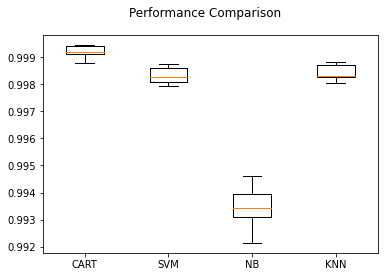

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#PIPELINING

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []

pipelines.append(('ScaleCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaleSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('ScaleNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaleKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))

In [ ]:
import warnings

names = []
results = []

with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  for name, model in models_list:
    kfold = KFold(n_splits = num_folds, random_state = 123)
    start = time()
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    end  = time()
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.999166 (0.000193) (run time: 226.930977)
SVM: 0.998319 (0.000294) (run time: 138.202021)
NB: 0.993482 (0.000681) (run time: 1.331558)
KNN: 0.998416 (0.000272) (run time: 27.920700)


#SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train, Y_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values= ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C = c_values, kernel = kernel_values)
model = SVC()
Kfold = KFold(n_splits = num_folds)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv=kfold)
grid_results = grid.fit(rescaledX, Y_train)
print("Best: %f using %s", grid_results.best_score_, grid_results.best_param_)
means = grid_results.cv_results['mean_test_score']
stds = grid_results.cv_results['std_test_score']
prarams = grid_results.cv_results['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  scaler = StandarsScaler().fit(X_train, Y_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=, kernel='')
start = time()
SVM.fit(X_train, Y_train)
end = time()
print("Run time: %f" % (end-start)) 

In [ ]:
from sklearn.metrics import confusion_matrix

with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  X_test_scaled = scaler.tranform(X_test)
SVM_pred = SVM.predict(X_test_scaled)

print(confusion_matrix(Y_test, SVM_pred))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, SVM_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import classification_report

print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

#NAIVE BAYES

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)
print(NB.score(X_test, Y_test))

NB_pred = NB.predict(X_test)
classifier.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))


#DECISION TREE

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_train,Y_train)

Y_pred = DT_classifier.predict(X_test)
DT_classifier.score(X_test, Y_test)
DT_classifier.fit(X_test,Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = data.columns[1:]
targetNames = data["diagnosis"].unique().tolist()
out=tree.export_graphviz(DT_classifier,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#DECISION TREE BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
Bagging.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))


#EXTREE TREE BAGGING

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET_Classifier = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

ET_Classifier.fit(X_train, Y_train)
ET_Classifier.score(X_train, Y_train)

ETPred = ET_Classifier.predict(X_test)
ET_Classifier.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

#RANDOM FOREST

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(criterion='entropy', random_state=0)
RF_classifier.fit(X_train,Y_train)
Y_pred = RF_classifier.predict(X_test)
RF_classifier.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

#GRADIENT DESCENT CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBClassifier.fit(X_train, Y_train)

GBPred = GBClassifier.predict(X_test)
GBClassifier.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, GBPred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, GBPred))
print(classification_report(Y_test, predictions))

#XGBOOST